In [8]:
import sys, os
sys.path.append(os.path.realpath('./../code/'))

import numpy as np
import kwant
import matplotlib.pyplot as plt
import ipywidgets
import codes.parameters

In [11]:
mu = codes.parameters.bands[0]

In [12]:
a = 10e-9

hamiltonian = """( t * (k_x**2 + k_y**2 ) - mu)* kron(sigma_0, sigma_z)
+ alpha * k_x * kron(sigma_y, sigma_z)
- alpha * k_y * kron(sigma_x, sigma_z)
+ Delta_re * kron(sigma_0, sigma_x)
+ Delta_im * kron(sigma_0, sigma_y)
+ B_x * kron(sigma_y, sigma_0)"""

template = kwant.continuum.discretize(hamiltonian, grid=a)

/tmp/ipykernel_28574/3778906928.py:10: KwantDeprecationWarning: Accessing kwant.continuum without an explicit import is deprecated. Instead, explicitly 'import kwant.continuum'.
  template = kwant.continuum.discretize(hamiltonian, grid=a)


In [14]:
params = codes.parameters.junction_parameters(0)
params.pop('phi1')
params.pop('phi2')
params.pop('sigma')
params.pop('a')
params.pop('mus_nw')
Delta = params.pop('Delta')
params.update(mu=mu)
params.update(Delta_re=Delta)
params.update(Delta_im=0)
params

{'t': 1.6561134509633838e-18,
 'alpha': 3e-11,
 'B_x': 0.001,
 'mu': 0.0023960204649275973,
 'Delta_re': 0.0005,
 'Delta_im': 0}

In [15]:
wire_width = 7 * a

In [16]:
lead = kwant.Builder(symmetry=kwant.TranslationalSymmetry([-a, 0]))
lead.fill(template, shape=lambda site: 0 <= site.pos[1] < wire_width, start=[0]);

In [17]:
def interact(function, **params):
    params_spec = {
        key: ipywidgets.FloatText(value=value, step=0.0005)
        for key, value in params.items()
    }
    return ipywidgets.interactive(function, **params_spec)

interactive(children=(FloatText(value=1.6561134509633838e-18, description='t', step=0.0005), FloatText(value=3…

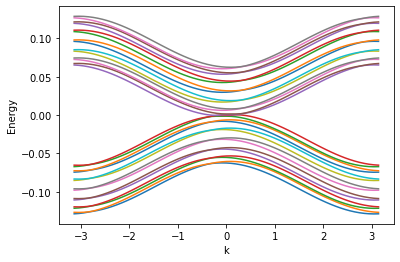

In [18]:
def plot_spectrum(**params):
    kwant.plotter.bands(lead.finalized(), show=False, params=params);
    bands = []
    for line in ax.lines:
        ks, band_data = line.get_data()
        bands.append(band_data)
    bands = np.array(bands)
    
    
interact(
    plot_spectrum,
    **params
)

In [19]:
k0_index = len(ks)//2
k0 = ks[k0_index]
assert k0 == 0
topo_gap = np.abs(bands[14][k0_index] - bands[13][k0_index])

NameError: name 'ks' is not defined

In [ ]:
topo_gap